In [1]:
library('palmerpenguins')

In [2]:
library('tidymodels')

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.9
✔ dials        1.2.0     ✔ rsample      1.2.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.4.4     ✔ tidyr        1.3.1
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.3.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.3.0

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



In [10]:
library('rpart.plot')

Loading required package: rpart


Attaching package: ‘rpart’


The following object is masked from ‘package:dials’:

    prune




In [3]:
penguins2 = penguins |> drop_na()

penguins2 |> head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>
Adelie,Torgersen,39.1,18.7,181,3750,male
Adelie,Torgersen,39.5,17.4,186,3800,female
Adelie,Torgersen,40.3,18.0,195,3250,female
Adelie,Torgersen,36.7,19.3,193,3450,female
Adelie,Torgersen,39.3,20.6,190,3650,male
Adelie,Torgersen,38.9,17.8,181,3625,female


In [18]:
penguins2 |>
    count(species)

species,n
<fct>,<int>
Adelie,146
Chinstrap,68
Gentoo,119


In [5]:
show_engines('decision_tree')

engine,mode
<chr>,<chr>
rpart,classification
rpart,regression
C5.0,classification
spark,classification
spark,regression


In [6]:
mod = decision_tree() |>
    set_engine('rpart') |>
    set_mode('classification')

mod_fit = mod |> fit(species ~ ., data = penguins2)

In [15]:
# augment(mod_fit, penguins2) |> head()

Warning message:
“Cannot retrieve the data used to build the model (so cannot determine roundint and is.binary for the variables).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE.”


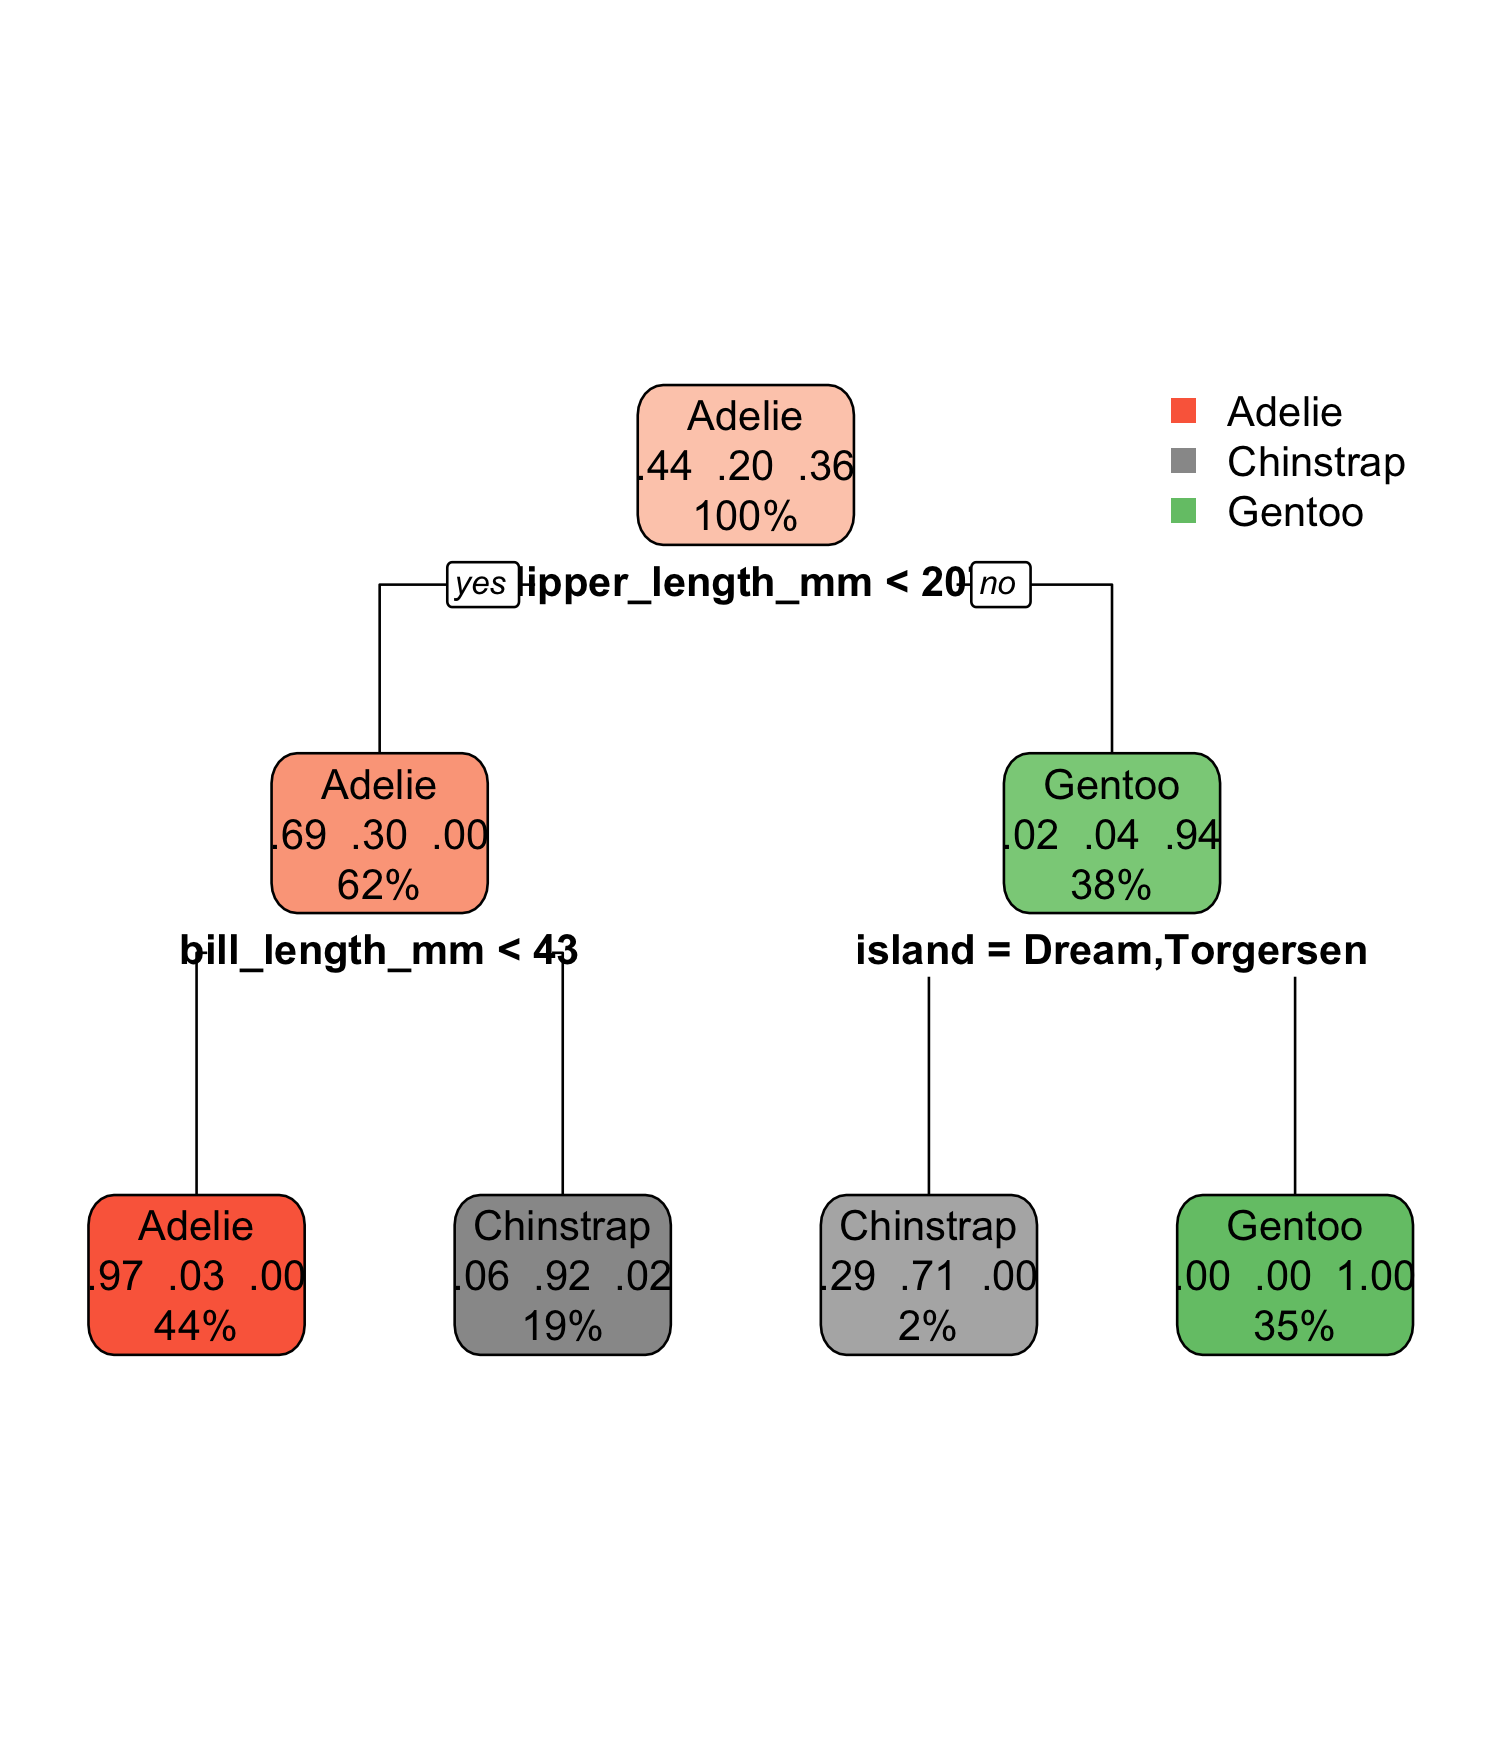

In [12]:
options(repr.plot.height = 7, repr.plot.width = 6)

rpart.plot(mod_fit$fit)

In [33]:
mod = rand_forest(trees = 1000) |>
    set_engine('ranger', importance = 'impurity',) |>
    set_mode('classification')

mod_fit = mod |> fit(species ~ ., data = penguins2)

In [34]:
mod_fit

parsnip model object

Ranger result

Call:
 ranger::ranger(x = maybe_data_frame(x), y = y, num.trees = ~1000,      importance = ~"impurity", num.threads = 1, verbose = FALSE,      seed = sample.int(10^5, 1), probability = TRUE) 

Type:                             Probability estimation 
Number of trees:                  1000 
Sample size:                      333 
Number of independent variables:  6 
Mtry:                             2 
Target node size:                 10 
Variable importance mode:         impurity 
Splitrule:                        gini 
OOB prediction error (Brier s.):  0.01640279 

In [26]:
# augment(mod_fit, penguins2) |> tail(50)

In [29]:
library('vip')


Attaching package: ‘vip’


The following object is masked from ‘package:utils’:

    vi




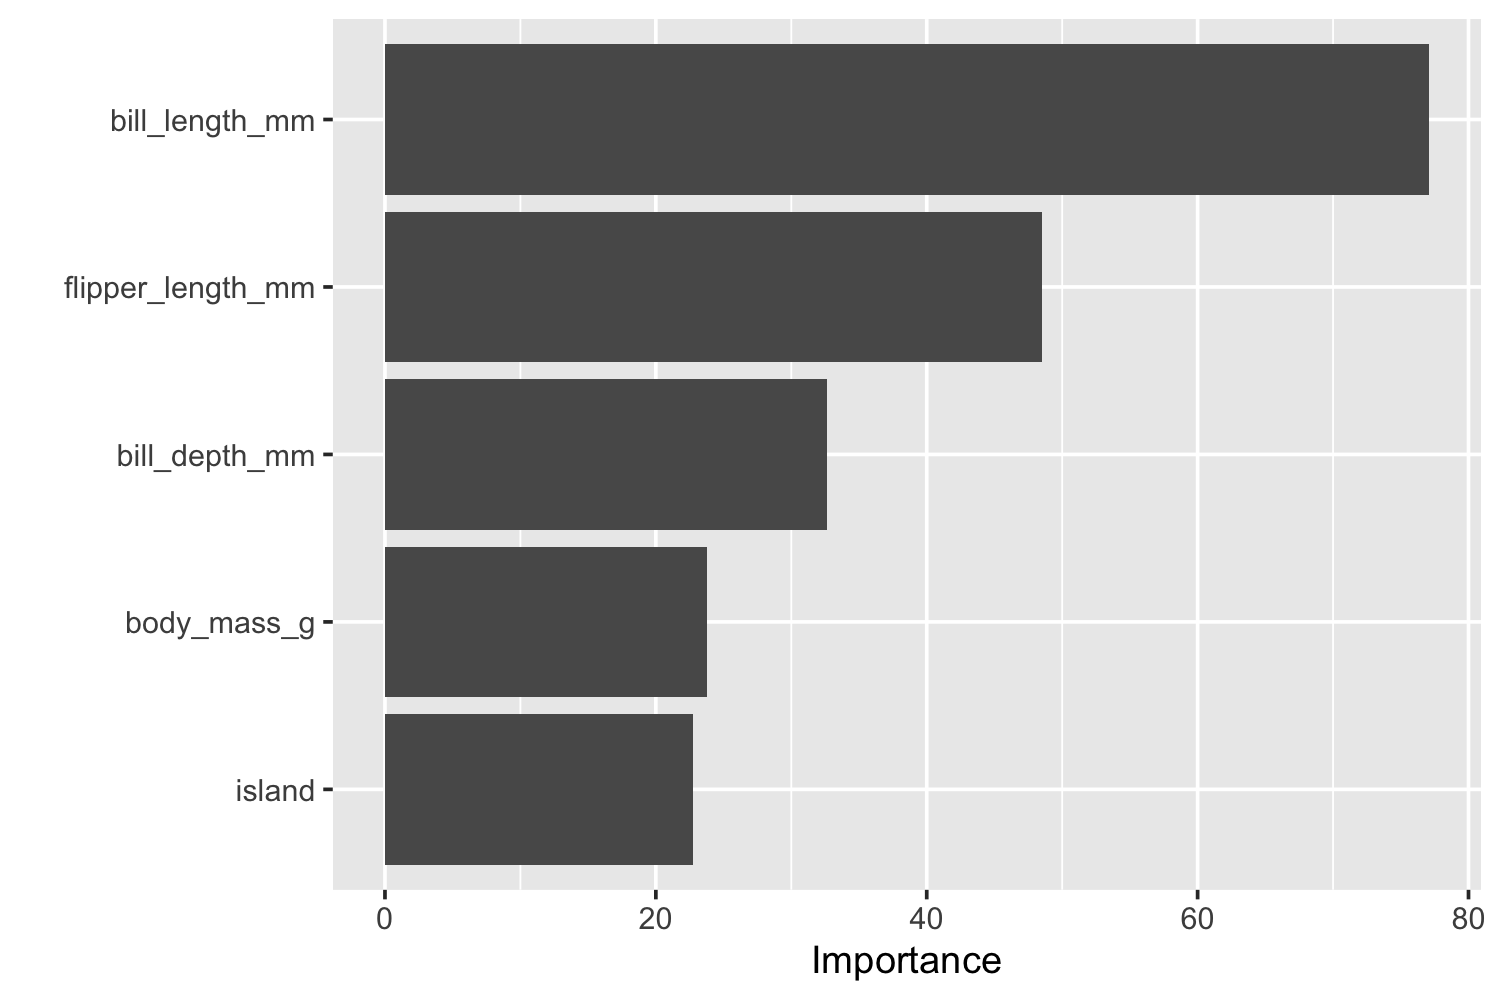

In [42]:
options(repr.plot.height = 4)

mod_fit |> extract_fit_engine() |> vip(num_features = 5)